<a href="https://colab.research.google.com/github/TrongAnh2210/AI_final_project/blob/main/AI_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from skimage.transform import resize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os import listdir
from numpy import asarray

folder = '/content/drive/MyDrive/Hand_writting/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('N0'):  #Chữ số
    output= 0.0
  if file.startswith('N1'):
    output= 1.0
  if file.startswith('N2'):
    output= 2.0
  if file.startswith('N3'):
    output= 3.0
  if file.startswith('N4'):
    output= 4.0
  if file.startswith('N5'):
    output= 5.0
  if file.startswith('N6'):
    output= 6.0
  if file.startswith('N7'):
    output= 7.0
  if file.startswith('N8'):
    output= 8.0
  if file.startswith('N9'):
    output= 9.0
  if file.startswith('A'):
    output= 10.0
  if file.startswith('B'):
    output= 11.0
  if file.startswith('C'):
    output= 12.0
  if file.startswith('D'):
    output= 13.0
  if file.startswith('E'):
    output= 14.0
  if file.startswith('F'):
    output= 15.0
  if file.startswith('G'):
    output= 16.0
  if file.startswith('H'):
    output= 17.0
  if file.startswith('I'):
    output= 18.0
  if file.startswith('J'):
    output= 19.0
  if file.startswith('K'):
    output= 20.0
  if file.startswith('L'):
    output= 21.0
  if file.startswith('M'):
    output= 22.0
  if file.startswith('NN'):
    output= 23.0
  if file.startswith('O'):
    output= 24.0
  if file.startswith('P'):
    output= 25.0
  if file.startswith('Q'):
    output= 26.0
  if file.startswith('R'):
    output= 27.0
  if file.startswith('S'):
    output= 28.0
  if file.startswith('T'):
    output= 29.0
  if file.startswith('U'):
    output= 30.0
  if file.startswith('V'):
    output= 31.0
  if file.startswith('W'):
    output= 32.0
  if file.startswith('X'):
    output= 33.0
  if file.startswith('Y'):
    output= 34.0
  if file.startswith('Z'):
    output= 35.0
  photo = load_img(folder + file, target_size=(28,28))
  photo = img_to_array(photo)
  photo = resize(photo, (28, 28, 1))
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Hand_writting_data/Handwritting_photos.npy', photos)
save('/content/drive/MyDrive/Hand_writting_data/Handwritting_labels.npy', labels)

(35746, 28, 28, 1) (35746,)


In [1]:

import numpy as np

# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Hand_writting_data/Handwritting_photos.npy')
labels = np.load('/content/drive/MyDrive/Hand_writting_data/Handwritting_labels.npy')
# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Chia ra thành 2 phần để test và train

test_x, test_y = photos[:150], labels[:150]
train_x, train_y = photos[150:], labels[150:]

In [2]:
#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import ReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras import layers
from keras.utils import np_utils
classes = 37
W = 28
H = 28
# Define model
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(W, H, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='same', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 256)               6

In [ ]:
#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=128), epochs=10, validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

Epoch 1/10
279/279 [==============================] - 17s 53ms/step - loss: 0.5096 - accuracy: 0.8367 - val_loss: 0.8483 - val_accuracy: 0.7800
Epoch 2/10
279/279 [==============================] - 13s 48ms/step - loss: 0.5132 - accuracy: 0.8353 - val_loss: 0.8940 - val_accuracy: 0.7667
Epoch 3/10
279/279 [==============================] - 13s 47ms/step - loss: 0.5125 - accuracy: 0.8349 - val_loss: 0.9140 - val_accuracy: 0.8000
Epoch 4/10
279/279 [==============================] - 13s 46ms/step - loss: 0.5132 - accuracy: 0.8343 - val_loss: 0.8349 - val_accuracy: 0.7867
Epoch 5/10
279/279 [==============================] - 13s 46ms/step - loss: 0.5024 - accuracy: 0.8385 - val_loss: 0.9707 - val_accuracy: 0.7600
Epoch 6/10
279/279 [==============================] - 13s 47ms/step - loss: 0.5042 - accuracy: 0.8349 - val_loss: 0.9312 - val_accuracy: 0.7800
Epoch 7/10
279/279 [==============================] - 13s 47ms/step - loss: 0.5171 - accuracy: 0.8337 - val_loss: 0.6685 - val_accuracy:

Test loss: 0.888131320476532
Test accunacy 0.8066666722297668


Text(0.5, 1.0, 'Training & Testing Accuracy')

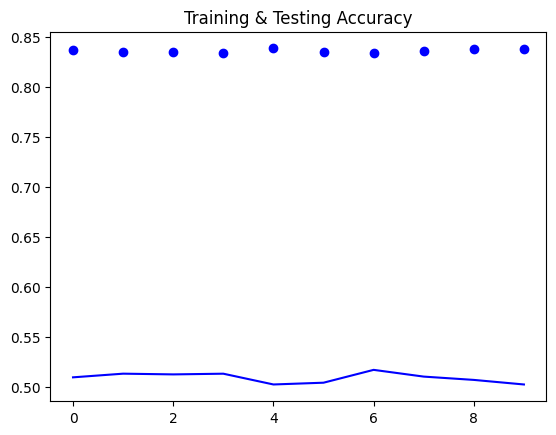

In [ ]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [ ]:
model.save('/content/drive/MyDrive/Hand_writting_data/Hand_writting.h5')

1/1 [==============================] - 0s 21ms/step
D


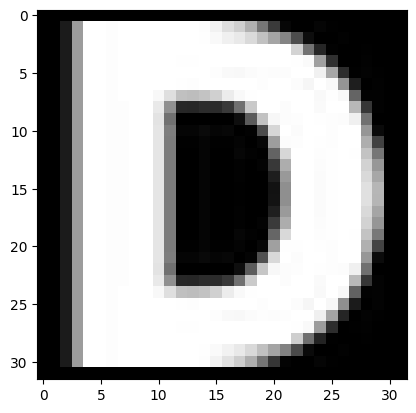

1/1 [==============================] - 0s 21ms/step
A


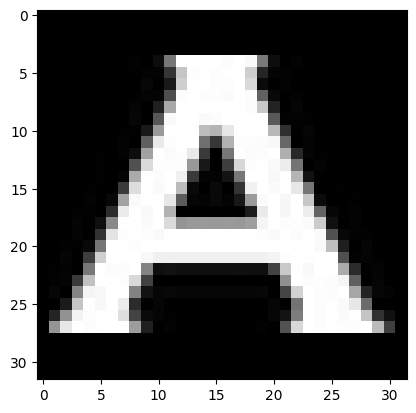

1/1 [==============================] - 0s 22ms/step
H


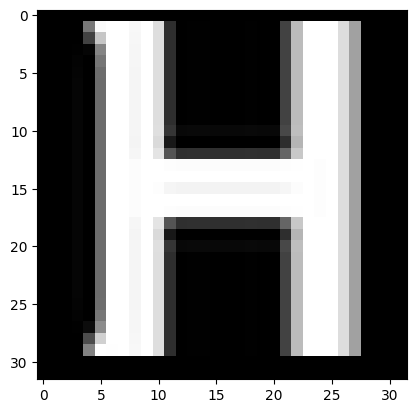

1/1 [==============================] - 0s 18ms/step
K


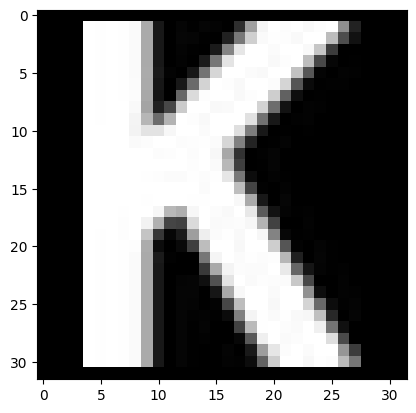

In [ ]:

#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
folder = '/content/drive/MyDrive/Hand_writting_test'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (28, 28))
  photo=img_to_array(photo)
  photo = resize(photo, (28, 28, 1))
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
  print(class_name[result])
  plt.show()